In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
mkt_df =\
(
    pd\
    .read_excel('market_portfolio.xlsx'
               )
)

ind_df =\
(
    pd
    .read_excel("Industry_Portfolios.xlsx"
               )
)

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
ind_df["Date"]=\
(
    ind_df
    .Date
    .apply(lambda x: str(x)
          )
)

ind_df["Date"]=\
(
    pd
    .to_datetime(ind_df.Date,
                 format="%Y%m"
                )
)

ind_df =\
(
    ind_df
    .set_index("Date")
)

In [4]:
mkt_df['Date']=\
(
    mkt_df
    .Date
    .apply(lambda x: str(x)
          )
)

mkt_df['Date']=\
(
    pd
    .to_datetime(mkt_df.Date,
                 format = "%Y%m"
                )
)

mkt_df =\
(
    mkt_df
    .set_index("Date"
              )
)

In [5]:
excess_tgt =\
(
    ind_df
    .subtract(mkt_df['Market'], 
              axis=0)
)

In [6]:
excess_tgt

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01-01,-2.16,-3.29,-2.84,-1.78,2.31,-0.81,-1.77,0.87,-0.30,0.66
2004-02-01,2.79,-1.53,0.49,3.23,-4.38,-1.98,4.63,-0.57,0.61,0.70
2004-03-01,1.14,0.08,0.96,1.10,-1.32,-0.84,1.52,-2.73,2.36,0.60
2004-04-01,3.17,4.05,1.58,4.27,-3.16,1.27,-0.95,5.29,-1.80,-2.01
2004-05-01,-3.12,-2.87,0.38,-0.84,3.62,-4.18,-0.93,-1.65,0.05,0.63
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,-1.31,1.69,0.74,0.86,2.57,-0.59,-1.52,-0.80,-1.74,-0.97
2013-09-01,-1.82,2.70,1.44,-1.73,0.01,0.57,0.70,0.43,-2.71,0.07
2013-10-01,0.58,-3.45,0.39,0.69,-0.37,1.35,0.91,-0.70,-0.82,-0.30


In [7]:
cov_deviation =\
(
    excess_tgt
    .cov()
)

In [8]:
cov_deviation

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


In [9]:
mean_deviation =\
(
    excess_tgt
    .mean(axis=0)
)

In [10]:
mean_deviation

NoDur    0.154750
Durbl   -0.014750
Manuf    0.264750
Enrgy    0.483083
HiTec    0.018167
Telcm    0.133333
Shops    0.168250
Hlth     0.035750
Utils    0.159083
Other   -0.259000
dtype: float64

In [11]:
R =\
    mean_deviation

V =\
    cov_deviation

V_matrix =\
    np\
    .asmatrix(V)

V_inv =\
    inv(V_matrix)

e =\
    np\
    .ones(
        (V_matrix.shape[0],1))

In [12]:
alpha =\
    float(R.T @ V_inv @ e)

print(alpha)

2.9321278826306236


/var/folders/3x/bb4zz1_x2xj63kgdx9trqbsr0000gn/T/ipykernel_2548/240958184.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(R.T @ V_inv @ e)


In [13]:
gamma =\
    float(R.T @ V_inv @ R)

print(gamma)

0.2047449735113007


In [14]:
delta =\
    float(e.T @ V_inv @ e)

print(delta)

58.55025437639894


/var/folders/3x/bb4zz1_x2xj63kgdx9trqbsr0000gn/T/ipykernel_2548/4160751079.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(e.T @ V_inv @ e)


In [15]:
R_mv =\
    alpha/delta

R_mv

0.05007882397540082

In [16]:
R_p =\
    np\
    .arange(0, 0.1, 0.005)

R_p

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095])

In [17]:
sigma =\
    np\
    .sqrt((1/delta)\
          + (delta/(gamma*delta-alpha**(2)))\
          * (R_p - R_mv)**(2))

sigma

array([0.24573951, 0.22841092, 0.21170414, 0.19577839, 0.18084016,
       0.16715441, 0.15505313, 0.14493377, 0.13723545, 0.13238122,
       0.13068838, 0.13227836, 0.13703694, 0.14465174, 0.15470158,
       0.16674674, 0.18038797, 0.19529109, 0.21118913, 0.22787394])

In [18]:
R_p_rf =\
    np\
    .linspace(0,
              0.1,
              20)

In [19]:
def rf_sd(alpha, gamma, delta, R_p_rf, rf_rt):
    
    sigma_p_riskless =\
        (R_p_rf - 0)/np.sqrt(gamma - 2*alpha*rf_rt + delta*(rf_rt**2))

    return sigma_p_riskless

In [20]:
sd_rf =\
    rf_sd(alpha,
           gamma,
           delta,
           R_p_rf,
           0)

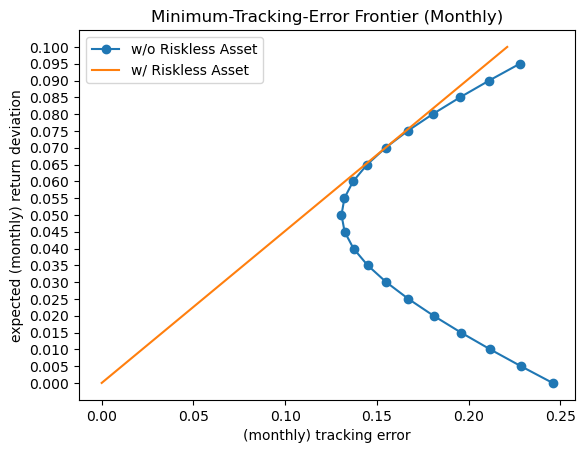

In [21]:
plt\
    .plot(sigma,
          R_p,
          label="w/o Riskless Asset",
          marker = 'o')


plt\
    .title("Minimum-Tracking-Error Frontier (Monthly)")

plt\
    .xlabel("(monthly) tracking error")

plt\
    .yticks(np\
            .arange(0,
                    0.105,
                    0.005))

plt\
    .ylabel("expected (monthly) return deviation")

plt\
    .plot(sd_rf,
          R_p_rf,
          label="w/ Riskless Asset")

plt\
    .legend()

plt\
    .show()

In [22]:
n_portfolios = 10000

In [23]:
portfolios =\
(
    np
    .zeros((n_portfolios,
            2))
)

In [24]:
for i in range(n_portfolios):
    
    weights =\
    (
        np
        .random
        .random(len(ind_df.columns))
    )
    
    weights /= np.sum(weights)

    # Portfolio return deviation and tracking error
    portfolio_ret_dev =\
    (
        np
        .dot(weights,
             excess_tgt.mean().values)
    )
    
    portfolio_tracking_err =\
    (
        np.sqrt(np.dot(weights.T,
                       np.dot(cov_deviation,
                              weights)))
    )

    portfolios[i, 0] = portfolio_tracking_err
    
    portfolios[i, 1] = portfolio_ret_dev

### Tangency Weights

In [25]:
rf_rt = 0

In [26]:
cov_deviation =\
(
    pd.DataFrame(cov_deviation)
)

In [27]:
R_excess =\
(
    mean_deviation 
    - 
    rf_rt
)

In [28]:
val_inv =\
(
    np
    .linalg
    .inv(cov_deviation.values)
)

In [29]:
cov_inv =\
(
    pd
    .DataFrame(val_inv,
               index=cov_deviation.index, 
               columns=cov_deviation.columns)
)

In [30]:
cov_inv

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.545383,0.045228,0.207945,0.278364,0.604681,0.153596,0.180488,0.190501,0.057465,0.759501
Durbl,0.045228,0.089652,-0.087449,0.038946,0.042978,0.006253,-0.000714,0.063052,0.027102,0.034553
Manuf,0.207945,-0.087449,1.139800,0.402051,1.056457,0.370595,0.577248,0.614377,0.304563,1.397908
Enrgy,0.278364,0.038946,0.402051,0.506498,0.953964,0.357385,0.462025,0.539515,0.189783,1.276576
HiTec,0.604681,0.042978,1.056457,0.953964,2.302373,0.743645,0.952973,1.159904,0.537593,2.841318
Telcm,0.153596,0.006253,0.370595,0.357385,0.743645,0.523995,0.330645,0.426827,0.118803,1.000794
Shops,0.180488,-0.000714,0.577248,0.462025,0.952973,0.330645,0.723155,0.534983,0.249115,1.283359
Hlth,0.190501,0.063052,0.614377,0.539515,1.159904,0.426827,0.534983,0.861345,0.272589,1.515965
Utils,0.057465,0.027102,0.304563,0.189783,0.537593,0.118803,0.249115,0.272589,0.304080,0.728516
Other,0.759501,0.034553,1.397908,1.276576,2.841318,1.000794,1.283359,1.515965,0.728516,3.950040


In [31]:
num_val =\
(
    np
    .dot(cov_inv,
         R_excess)
)

In [32]:
numerator =\
(
    pd
    .DataFrame(num_val, 
               index = R_excess.index)
)

In [33]:
denominator =\
(
    np
    .dot(np.ones(len(R_excess)),
         numerator)
)

In [34]:
tangency_weights =\
(
    numerator 
    /
    denominator
)

In [35]:
tangency_weights.columns = ['Tangency Portfolio Weights']

In [36]:
tangency_weights

,Tangency Portfolio Weights
NoDur,0.052634
Durbl,0.000153
Manuf,0.137627
Enrgy,0.087032
HiTec,0.179353
Telcm,0.071074
Shops,0.106884
Hlth,0.102776
Utils,0.040162
Other,0.222304


### Tangency Information Ratio

In [38]:
exp_pf_ret =\
(
    np
    .dot(tangency_weights.T,
         R_excess)
)

In [40]:
rf_rt = 0

In [41]:
exp_ex_ret =\
(
    exp_pf_ret 
    - 
    rf_rt
)

In [42]:
tracking_error =\
(
    np
    .sqrt(np.dot(tangency_weights.T, 
                 np.dot(cov_deviation, 
                        tangency_weights
                       )
                )
         )
)

In [43]:
tangency_info_ratio =\
(
    exp_ex_ret
    /
    tracking_error
)

In [44]:
print('The information ratio of tangency_portfolio:',tangency_info_ratio)

The information ratio of tangency_portfolio: [[0.45248754]]


In [45]:
tangency_info_ratio_array =\
(
    np
    .array(tangency_info_ratio)
)

In [46]:
tangency_info_ratio_df =\
(
    pd
    .DataFrame(tangency_info_ratio_array)
)

In [47]:
tangency_info_ratio_df.columns = ['Tangency Information Ratio']

In [48]:
tangency_info_ratio_df.T

,0
Tangency Information Ratio,0.452488


### mean_returns: A 10 × 1 vector of mean returns for the ten industry portfolios
### cov_matrix: A 10 × 10 covariance matrix of returns for the ten industry portfolios

In [62]:
n_simulations = 10**5

In [51]:
results =\
(
    np
    .zeros((n_simulations,
            2)
          )
)

In [52]:
results_reciprocal =\
(
    np
    .zeros((n_simulations,
            2)
          )
)

In [53]:
ind_mean =\
(
    ind_df
    .T
    .mean(axis=1)
)

In [54]:
cov_ind =\
(
    ind_df
    .cov()
)

### Simulate portfolios without short sales

In [63]:
for i in range(n_simulations):
    # Generate random weights
    weights =\
    (
        np
        .random
        .rand(10)
    )
    
    weights /= np.sum(weights)  # Normalize to sum to 1

    # Calculate portfolio mean return and standard deviation
    portfolio_return =\
    (
        np
        .dot(weights,
             ind_mean)
    )
    
    portfolio_std_dev =\
    (
        np
        .sqrt(np.dot(weights.T,
                     np.dot(cov_ind,
                            weights)
                    )
             )
    )

    results[i, 0] = portfolio_return  # Mean return
    
    results[i, 1] = portfolio_std_dev  # Standard deviation

### Simulate portfolios using reciprocal weights

In [57]:
for i in range(n_simulations):
    # Generate random weights from uniform distribution, take reciprocal
    weights_reciprocal =\
    (
        1 
        /
        np
        .random
        .rand(10)
    )
    
    weights_reciprocal /= np.sum(weights_reciprocal)  # Normalize to sum to 1

    # Calculate portfolio mean return and standard deviation
    portfolio_return_reciprocal =\
    (
        np
        .dot(weights_reciprocal,
             ind_mean)
    )
    
    portfolio_std_dev_reciprocal =\
    (
        np
        .sqrt(np.dot(weights_reciprocal.T, 
                     np.dot(cov_ind,
                            weights_reciprocal)
                    )
             )
    )

    results_reciprocal[i, 0] = portfolio_return_reciprocal  # Mean return
    
    results_reciprocal[i, 1] = portfolio_std_dev_reciprocal  # Standard deviation

### Plotting results for normal weights

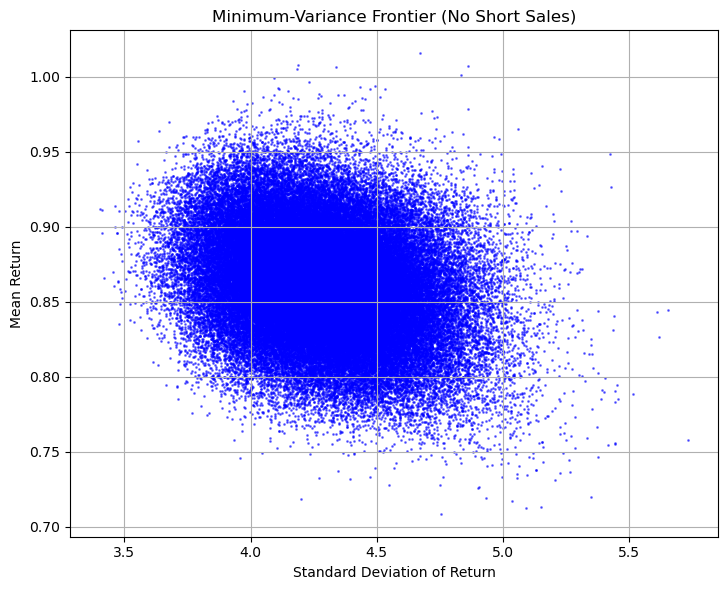

In [58]:
plt\
    .figure(figsize=(14,
                     6)
           )

plt\
    .subplot(1,
             2,
             1)

plt\
    .scatter(results[:, 1],
             results[:, 0],
             c='blue', 
             alpha=0.5,
             s=1)

plt\
    .title('Minimum-Variance Frontier (No Short Sales)')

plt\
    .xlabel('Standard Deviation of Return')

plt\
    .ylabel('Mean Return')

plt\
    .grid()

plt\
    .tight_layout()

plt\
    .show()

### Plotting results for reciprocal weights

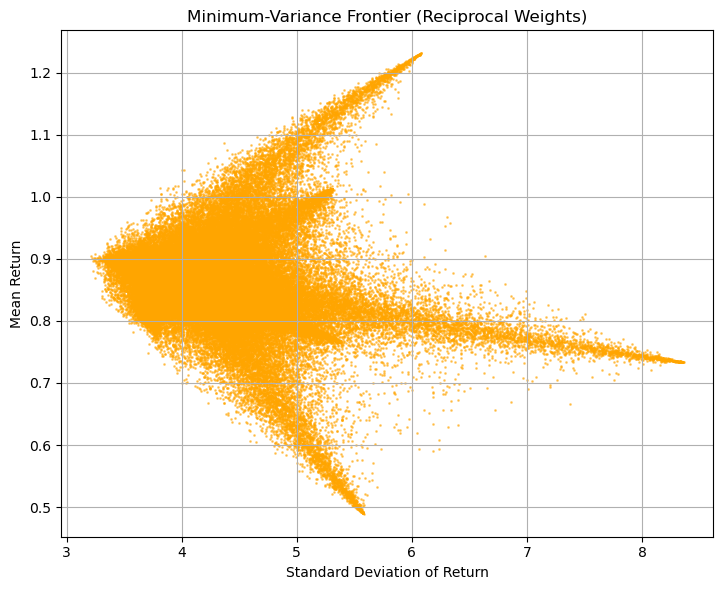

In [59]:
plt\
    .figure(figsize=(14,
                     6)
           )

plt\
    .subplot(1,
             2,
             2)

plt\
    .scatter(results_reciprocal[:, 1],
             results_reciprocal[:, 0],
             c='orange',
             alpha=0.5,
             s=1)

plt\
    .title('Minimum-Variance Frontier (Reciprocal Weights)')

plt\
    .xlabel('Standard Deviation of Return')

plt\
    .ylabel('Mean Return')

plt\
    .grid()

plt\
    .tight_layout()

plt\
    .show()